In [35]:
import  pandas as pd

In [36]:
df_train = pd.read_csv('train.csv')

In [37]:
df_train.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [38]:
df_train['gesture'].value_counts()

gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64

In [39]:
print(df_train.isnull().sum().to_string())

row_id                  0
sequence_type           0
sequence_id             0
sequence_counter        0
subject                 0
orientation             0
behavior                0
phase                   0
gesture                 0
acc_x                   0
acc_y                   0
acc_z                   0
rot_w                3692
rot_x                3692
rot_y                3692
rot_z                3692
thm_1                6987
thm_2                7638
thm_3                6472
thm_4                6224
thm_5               33286
tof_1_v0             6224
tof_1_v1             6224
tof_1_v2             6224
tof_1_v3             6224
tof_1_v4             6224
tof_1_v5             6224
tof_1_v6             6224
tof_1_v7             6224
tof_1_v8             6224
tof_1_v9             6224
tof_1_v10            6224
tof_1_v11            6224
tof_1_v12            6224
tof_1_v13            6224
tof_1_v14            6224
tof_1_v15            6224
tof_1_v16            6224
tof_1_v17   

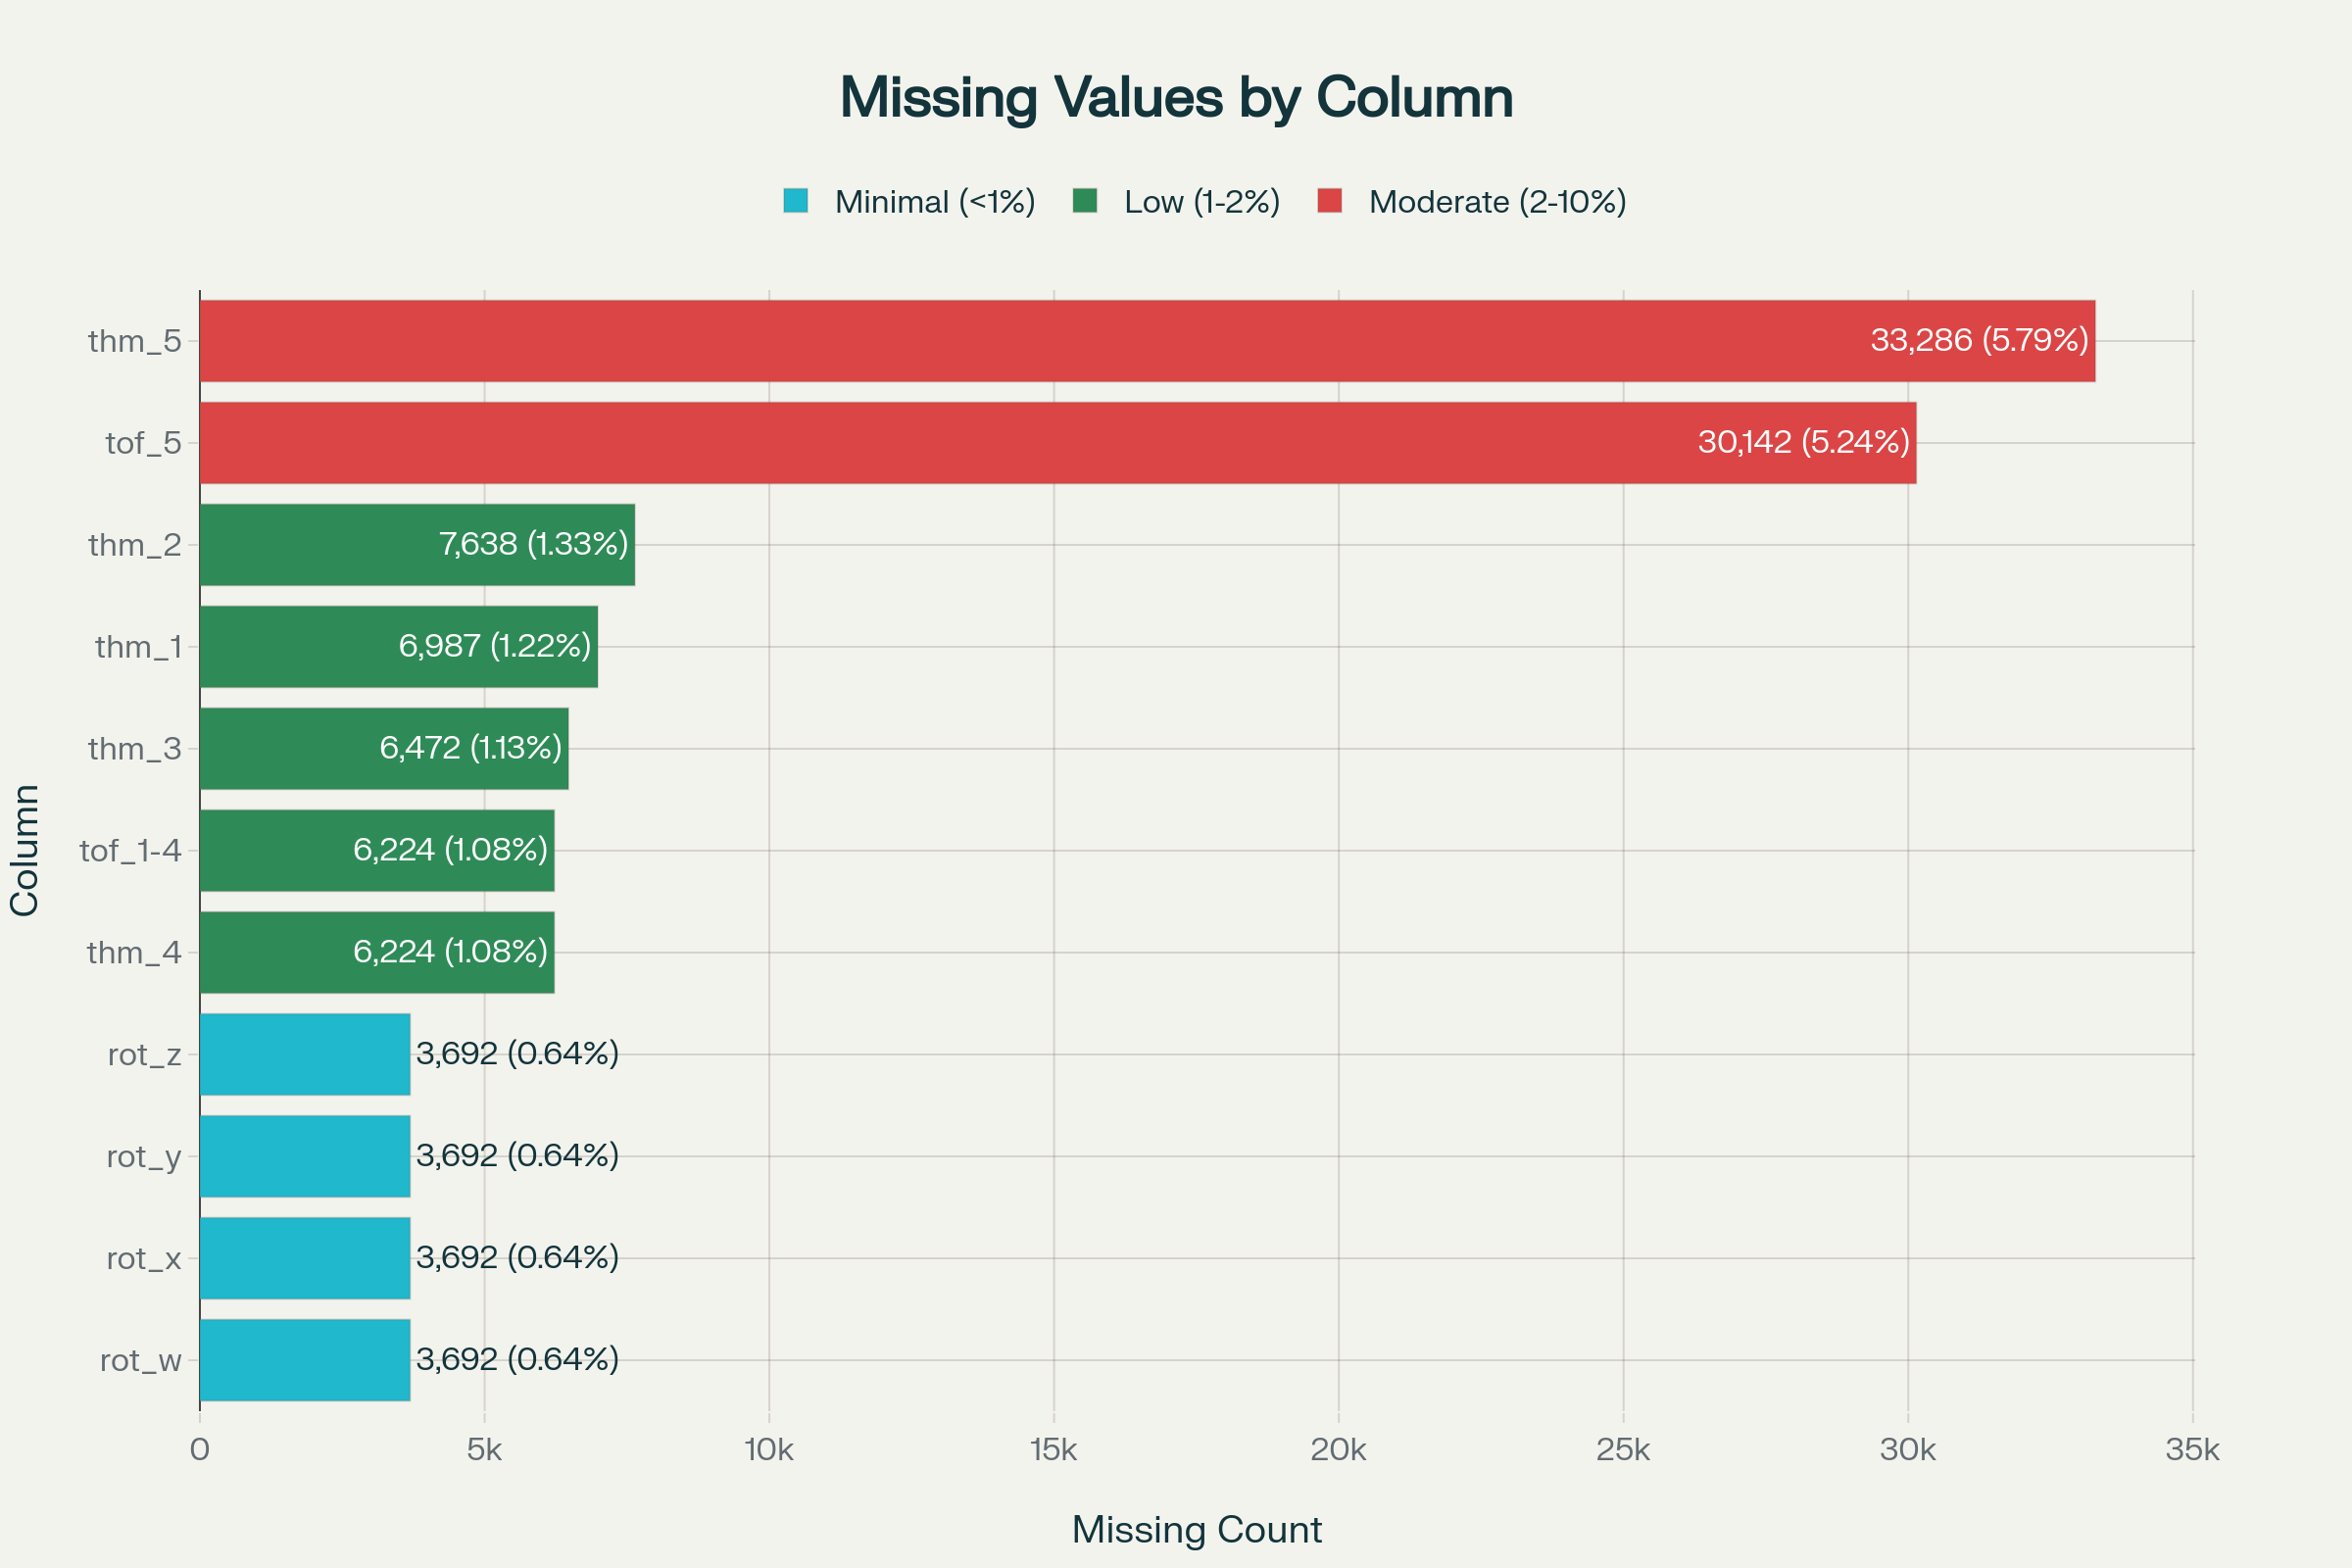

In [40]:
df_train.shape



(574945, 341)

In [41]:
# Impute missing values using forward-fill within each sequence
for col in ['rot_w', 'rot_x', 'rot_y', 'rot_z']:
    df_train[col] = df_train.groupby('sequence_id')[col].fillna(method='ffill')

# Impute remaining missing values with the median of each column
for col in ['rot_w', 'rot_x', 'rot_y', 'rot_z']:
    median_val = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_val)

# Verify that there are no missing values in the specified columns
print(df_train[['rot_w', 'rot_x', 'rot_y', 'rot_z']].isnull().sum())



C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1361930764.py:3: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_train[col] = df_train.groupby('sequence_id')[col].fillna(method='ffill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1361930764.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train[col] = df_train.groupby('sequence_id')[col].fillna(method='ffill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1361930764.py:3: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_train[col] = df_train.groupby('sequence_id')[col

rot_w    0
rot_x    0
rot_y    0
rot_z    0
dtype: int64


In [42]:
thm_cols = ['thm_1', 'thm_2', 'thm_3', 'thm_4']
tof_cols_1_4 = [f'tof_{sensor}_v{pixel}' for sensor in range(1, 5) for pixel in range(64)]

for col in thm_cols:
    df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)

for col in tof_cols_1_4:
    df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)

# Verify the creation of flag columns for a few examples
print(df_train[['thm_1_missing_flag', 'tof_1_v0_missing_flag']].head())



C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

   thm_1_missing_flag  tof_1_v0_missing_flag
0                   0                      0
1                   0                      0
2                   0                      0
3                   0                      0
4                   0                      0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f'{col}_missing_flag'] = df_train[col].isnull().astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28580\1585134610.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [43]:
for col in thm_cols:
    df_train[col] = df_train.groupby('sequence_id')[col].ffill()

for col in tof_cols_1_4:
    df_train[col] = df_train.groupby('sequence_id')[col].ffill()

# Impute remaining missing values in thm columns with the median
for col in thm_cols:
    median_val = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_val)

# Impute remaining missing values in tof columns with zero
for col in tof_cols_1_4:
    df_train[col] = df_train[col].fillna(0)

# Verify that there are no missing values in the imputed columns
print(df_train[thm_cols + tof_cols_1_4].isnull().sum().to_string())



thm_1        0
thm_2        0
thm_3        0
thm_4        0
tof_1_v0     0
tof_1_v1     0
tof_1_v2     0
tof_1_v3     0
tof_1_v4     0
tof_1_v5     0
tof_1_v6     0
tof_1_v7     0
tof_1_v8     0
tof_1_v9     0
tof_1_v10    0
tof_1_v11    0
tof_1_v12    0
tof_1_v13    0
tof_1_v14    0
tof_1_v15    0
tof_1_v16    0
tof_1_v17    0
tof_1_v18    0
tof_1_v19    0
tof_1_v20    0
tof_1_v21    0
tof_1_v22    0
tof_1_v23    0
tof_1_v24    0
tof_1_v25    0
tof_1_v26    0
tof_1_v27    0
tof_1_v28    0
tof_1_v29    0
tof_1_v30    0
tof_1_v31    0
tof_1_v32    0
tof_1_v33    0
tof_1_v34    0
tof_1_v35    0
tof_1_v36    0
tof_1_v37    0
tof_1_v38    0
tof_1_v39    0
tof_1_v40    0
tof_1_v41    0
tof_1_v42    0
tof_1_v43    0
tof_1_v44    0
tof_1_v45    0
tof_1_v46    0
tof_1_v47    0
tof_1_v48    0
tof_1_v49    0
tof_1_v50    0
tof_1_v51    0
tof_1_v52    0
tof_1_v53    0
tof_1_v54    0
tof_1_v55    0
tof_1_v56    0
tof_1_v57    0
tof_1_v58    0
tof_1_v59    0
tof_1_v60    0
tof_1_v61    0
tof_1_v62 

In [44]:
print(df_train.isnull().sum().to_string())



row_id                        0
sequence_type                 0
sequence_id                   0
sequence_counter              0
subject                       0
orientation                   0
behavior                      0
phase                         0
gesture                       0
acc_x                         0
acc_y                         0
acc_z                         0
rot_w                         0
rot_x                         0
rot_y                         0
rot_z                         0
thm_1                         0
thm_2                         0
thm_3                         0
thm_4                         0
thm_5                     33286
tof_1_v0                      0
tof_1_v1                      0
tof_1_v2                      0
tof_1_v3                      0
tof_1_v4                      0
tof_1_v5                      0
tof_1_v6                      0
tof_1_v7                      0
tof_1_v8                      0
tof_1_v9                      0
tof_1_v1

In [45]:
df_train.shape

(574945, 601)

In [46]:
# List of columns to drop
cols_to_drop = ['thm_5'] + [f'tof_5_v{i}' for i in range(64)]

# Drop them from the dataframe
df_train = df_train.drop(columns=cols_to_drop)

# Optional: confirm removal
print("Dropped columns successfully. Remaining columns:")
print(df_train.columns)


Dropped columns successfully. Remaining columns:
Index(['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase', 'gesture', 'acc_x',
       ...
       'tof_4_v54_missing_flag', 'tof_4_v55_missing_flag',
       'tof_4_v56_missing_flag', 'tof_4_v57_missing_flag',
       'tof_4_v58_missing_flag', 'tof_4_v59_missing_flag',
       'tof_4_v60_missing_flag', 'tof_4_v61_missing_flag',
       'tof_4_v62_missing_flag', 'tof_4_v63_missing_flag'],
      dtype='object', length=536)


In [47]:
print(df_train.isnull().sum().to_string())



row_id                    0
sequence_type             0
sequence_id               0
sequence_counter          0
subject                   0
orientation               0
behavior                  0
phase                     0
gesture                   0
acc_x                     0
acc_y                     0
acc_z                     0
rot_w                     0
rot_x                     0
rot_y                     0
rot_z                     0
thm_1                     0
thm_2                     0
thm_3                     0
thm_4                     0
tof_1_v0                  0
tof_1_v1                  0
tof_1_v2                  0
tof_1_v3                  0
tof_1_v4                  0
tof_1_v5                  0
tof_1_v6                  0
tof_1_v7                  0
tof_1_v8                  0
tof_1_v9                  0
tof_1_v10                 0
tof_1_v11                 0
tof_1_v12                 0
tof_1_v13                 0
tof_1_v14                 0
tof_1_v15           

In [48]:
df_train.shape



(574945, 536)

In [49]:
df_train['sequence_id'].value_counts()



sequence_id
SEQ_015261    700
SEQ_014205    671
SEQ_028188    647
SEQ_060593    630
SEQ_016031    567
             ... 
SEQ_011271     34
SEQ_032114     34
SEQ_022667     34
SEQ_059162     34
SEQ_009199     29
Name: count, Length: 8151, dtype: int64

In [50]:
df_train_demographics = pd.read_csv('train_demographics.csv')

df_train_final = pd.merge(df_train, df_train_demographics, on='subject', how='left')
display(df_train_final.head())



,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_4_v61_missing_flag,tof_4_v62_missing_flag,tof_4_v63_missing_flag,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,0,0,0,0,12,1,1,163.0,52,24.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,0,0,0,0,12,1,1,163.0,52,24.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,0,0,0,0,12,1,1,163.0,52,24.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,0,0,0,0,12,1,1,163.0,52,24.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,0,0,0,0,12,1,1,163.0,52,24.0


In [51]:
df_train_final.shape



(574945, 543)

In [52]:
df_train_final.drop(columns=['row_id'],inplace = True)

categorical_cols = df_train_final.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:")
print(categorical_cols)



Categorical columns:
['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


In [53]:
from sklearn.preprocessing import LabelEncoder

categorical_cols_to_encode = ['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']
label_encoders = {}

for col in categorical_cols_to_encode:
    label_encoders[col] = LabelEncoder()
    df_train_final[col] = label_encoders[col].fit_transform(df_train_final[col])

print("Label encoding applied to the following columns:")
print(categorical_cols_to_encode)
display(df_train_final.head())



Label encoding applied to the following columns:
['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,acc_y,...,tof_4_v61_missing_flag,tof_4_v62_missing_flag,tof_4_v63_missing_flag,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,1,0,0,73,2,3,1,1,6.683594,6.214844,...,0,0,0,0,12,1,1,163.0,52,24.0
1,1,0,1,73,2,3,1,1,6.949219,6.214844,...,0,0,0,0,12,1,1,163.0,52,24.0
2,1,0,2,73,2,3,1,1,5.722656,5.410156,...,0,0,0,0,12,1,1,163.0,52,24.0
3,1,0,3,73,2,3,1,1,6.601562,3.531250,...,0,0,0,0,12,1,1,163.0,52,24.0
4,1,0,4,73,2,3,1,1,5.566406,0.277344,...,0,0,0,0,12,1,1,163.0,52,24.0


In [54]:
from sklearn.model_selection import train_test_split

output_cols = ['gesture']

X = df_train_final.drop(columns=output_cols)
y = df_train_final[output_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split performed.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Train-test split performed.
Shape of X_train: (459956, 541)
Shape of X_test: (114989, 541)
Shape of y_train: (459956, 1)
Shape of y_test: (114989, 1)


In [55]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

BEST_PARAMS = {
    'objective': 'multiclass',
    'num_class': 18,
    'num_leaves': 50,
    'max_depth': 12,
    'learning_rate': 0.05,
    'n_estimators': 400,
    'min_child_samples': 15,
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'lambda_l1': 0.3,
    'lambda_l2': 0.3,
    'metric': 'multi_logloss',
    'verbose': -1,
    'random_state': 42,
    'n_jobs': -1,
    
}

print("Training LightGBM...")
lgbm = lgb.LGBMClassifier(**BEST_PARAMS)
lgbm.fit(X_train, y_train_enc)

# Predictions
y_pred = lgbm.predict(X_test)

# Results
accuracy = accuracy_score(y_test_enc, y_pred)
f1 = f1_score(y_test_enc, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test_enc, y_pred))


Training LightGBM...


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.9529
F1 Score: 0.9620
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      8002
           1       0.93      0.93      0.93      8001
           2       0.98      0.99      0.98      2603
           3       0.93      0.93      0.93      8941
           4       0.92      0.94      0.93      8177
           5       0.99      0.99      0.99      3460
           6       0.92      0.94      0.93      8175
           7       0.93      0.93      0.93      8068
           8       0.99      0.99      0.99      2686
           9       0.93      0.91      0.92      7957
          10       0.94      0.95      0.94     11447
          11       1.00      0.99      0.99      2058
          12       0.98      0.98      0.98      6158
          13       1.00      0.99      1.00      2557
          14       0.98      0.99      0.98     11484
          15       0.98      0.97      0.98      6945
          16       0.98      0.98      0.98    